In [150]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import iApi
iApi.headers['api-key']='cc4ff6392e79c9e08c158e5ae5493718'
%matplotlib inline

In [152]:
#unrelated but wanted to save this
from astropy import constants as const
G=const.G.to('kpc3 / (solMass Gyr2)')
print(G.value)
def deltaV(G,M,b,y,r,v):
    return (6*np.pi*G*M*y*b*np.power(r,2))/(v*np.power(np.power(b,2)+np.power(y,2),5/2))
M=2e10
b=100
r=10
y=np.pi*r
v=100
print(deltaV(5e-6,M,b,y,r,v)/v)

4.498502151575286e-06
0.00468012113274


In [85]:
def getJ(pos,vel,rMax):
    rad=np.linalg.norm(pos,axis=1)
    inRad=np.argwhere(rad<rMax)
    j=np.cross(pos[inRad],vel[inRad])
    return np.sum(j,axis=0)
fields=[
    [0,'Coordinates'],
    [0,'Velocities'],
    [4,'Coordinates'],
    [4,'Velocities']
]
whichGal=294303
nSnaps=50
jTotalGas=np.zeros((nSnaps,3))
jTotalStar=np.zeros((nSnaps,3))
mStar=np.zeros(nSnaps)
mGas=np.zeros(nSnaps)
mDM=np.zeros(nSnaps)
snaps,subs=iApi.getTree(whichGal)
for i in range(nSnaps):
    print('step: ',i)
    snap=snaps[i]
    sub=subs[i]
    data=iApi.getGalaxy(sub,fields,snapshot=snap)
    subData=iApi.getSubhaloData(sub,snapshot=snap)
    rGas=data[0]-subData['SubhaloPos']
    vGas=data[1]-subData['SubhaloVel']
    rStar=data[2]-subData['SubhaloPos']
    vStar=data[3]-subData['SubhaloVel']

    rHalf=subData['SubhaloHalfmassRadType'][4]
    jTotalGas[i,:]=getJ(rGas,vGas,2*rHalf)
    jTotalStar[i,:]=getJ(rStar,vStar,2*rHalf)
    mStar[i]=subData['SubhaloMassType'][4]
    mGas[i]=subData['SubhaloMassType'][0]
    mDM[i]=subData['SubhaloMassType'][1]

step:  0
step:  1
step:  2
step:  3
step:  4
step:  5
step:  6
step:  7
step:  8
step:  9
step:  10
step:  11
step:  12
step:  13
step:  14
step:  15
step:  16
step:  17
step:  18
step:  19
step:  20
step:  21
step:  22
step:  23
step:  24
step:  25
step:  26
step:  27
step:  28
step:  29
step:  30
step:  31
step:  32
step:  33
step:  34
step:  35
step:  36
step:  37
step:  38
step:  39
step:  40
step:  41
step:  42
step:  43
step:  44
step:  45
step:  46
step:  47
step:  48
step:  49


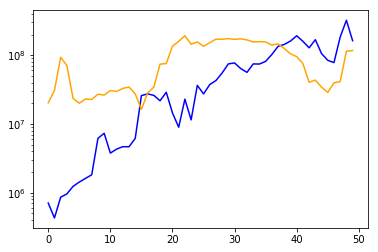

In [86]:
jZ=plt.gca()
jZ.plot(range(nSnaps),np.linalg.norm(jTotalGas,axis=1),c='b')
jZ.plot(range(nSnaps),np.linalg.norm(jTotalStar,axis=1),c='orange')
jZ.set_yscale('log')

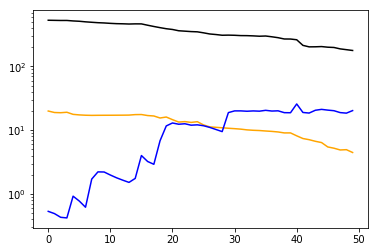

In [87]:
mZ=plt.gca()
mZ.plot(range(nSnaps),mStar,c='orange')
mZ.plot(range(nSnaps),mGas,c='b')
mZ.plot(range(nSnaps),mDM,c='k')
mZ.set_yscale('log')

In [151]:
data=iApi.getSimData()
print(data['Redshifts'])

[[  0.00000000e+00   4.67730473e+01   2.09323051e-02   5.08405346e-05]
 [  1.00000000e+00   4.45622038e+01   2.19480165e-02   5.45854896e-05]
 [  2.00000000e+00   4.24536738e+01   2.30130139e-02   5.86062963e-05]
 [  3.00000000e+00   4.06395569e+01   2.40156254e-02   6.24776379e-05]
 [  4.00000000e+00   3.87125594e+01   2.51809507e-02   6.70797731e-05]
 [  5.00000000e+00   3.68747395e+01   2.64028218e-02   7.20208952e-05]
 [  6.00000000e+00   3.51219704e+01   2.76839826e-02   7.73259712e-05]
 [  7.00000000e+00   3.36139397e+01   2.88900948e-02   8.24338350e-05]
 [  8.00000000e+00   3.20120740e+01   3.02919471e-02   8.85059012e-05]
 [  9.00000000e+00   3.04843396e+01   3.17618223e-02   9.50252147e-05]
 [  1.00000000e+01   2.90273057e+01   3.33030213e-02   1.02024713e-04]
 [  1.10000000e+01   2.76377005e+01   3.49190047e-02   1.09539760e-04]
 [  1.20000000e+01   2.64421253e+01   3.64403263e-02   1.16775416e-04]
 [  1.30000000e+01   2.51721572e+01   3.82085432e-02   1.25376902e-04]
 [  1.